<a href="https://colab.research.google.com/github/KateT840/M-computacionales-1/blob/main/Bono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
sym.init_printing(use_unicode=True)

In [ ]:
from sympy import symbols, expand, factor, roots

# Definir variable
z = symbols('z')

# Definir la expresión
expr = z**3 - 1

# Factorizar la expresión
factored_expr = factor(expr)

# Calcular raíces complejas
complex_roots = roots(expr)
#factored_expr
complex_roots

⎧        1   √3⋅ⅈ       1   √3⋅ⅈ   ⎫
⎨1: 1, - ─ - ────: 1, - ─ + ────: 1⎬
⎩        2    2         2    2     ⎭

In [ ]:
from sympy import symbols, expand, factor

# Definir variable
z = symbols('z')

# Definir la expresión
expr = z**3 - 1

# Factorizar la expresión en términos de raíces complejas
factored_expr = factor(expr, extension=True)

# Expandir la factorización
expanded_expr = expand(factored_expr)
expanded_expr

 3    
z  - 1

In [10]:
from sympy import symbols, expand, roots

x, y, z, i, j = symbols('x y z i j')

# Definir reglas de los terniones
rules = {i*i: -1, j*j: -1, i*j: 0, j*i: 0, i*i*i:-i, j*j*j:-j}

# Expresión a expandir
expr = (x + y*i + z*j) ** 3

# Expandimos y sustituimos reglas
expanded_expr = expand(expr).subs(rules)
expanded_expr

     2        3          2        2          2        3    3        2        2
3⋅i⋅x ⋅y - i⋅y  - 3⋅i⋅y⋅z  + 3⋅j⋅x ⋅z - 3⋅j⋅y ⋅z - j⋅z  + x  - 3⋅x⋅y  - 3⋅x⋅z 

In [29]:
G = (lambda x,y,z: x**3 - 3*x*y**2 - 3*x*z**2 - 1, \
     lambda x,y,z: 3*x**2*y - y**3 - 3*z**2*y , \
     lambda x,y,z: 3*x**2*z - 3*y**2*z - z**3 )

In [36]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1],r[2])

    return v

In [37]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h)


    return J

In [38]:
def NewtonRaphson(G,r, tolerancia = 1e-10):

  it = 0
  d = 1.
  Distance = np.array([])

  while d  > tolerancia:

    F = GetVectorF(G,r)
    J = GetJacobian(G,r)
    InvJ = np.linalg.inv(J)

    r_new = r - np.dot(InvJ,F)

    diff = r_new - r
    #print(diff)
    d = np.linalg.norm(diff)
    #print(d)
    Distance = np.append(Distance,d)

    if it%50 == 0:
      print(it,d)

    r = r_new
    it += 1

  return r,Distance

In [75]:
r1_inicial = np.array([1.0, 0.0, 0.0]) #solución "trivial"
r2_inicial = np.array([-1.0, 0.0, 1.0])
r3_inicial = np.array([-0.49, 0.0, 0.9])


In [76]:
solucion, distancia = NewtonRaphson(G, r3_inicial)
solucion

0 0.03456022366179121


array([-0.5      ,  0.       ,  0.8660254])

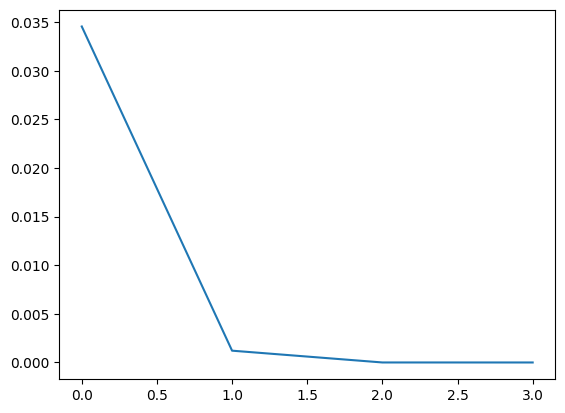

In [77]:
plt.plot(distancia)